In [32]:
# importing required libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 100

In [98]:
df = pd.read_csv(r"C:\Users\RAVI JOON\Downloads\Fraud.csv")

In [99]:
df.head(100)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.00,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.00,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [101]:
# The are 8 numerical columns in the dataset out of which 5 are continuous and 3 are discrete.
# The number of categorical columns are 3.

In [103]:
# Since we do not include the PII(personal identifiable information) in the data in order to generalize the data. 
# we'll drop the nameorig column from the analysis. 

In [104]:
df = df.drop(['nameOrig'],axis=1)

In [105]:
# describing the data.
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
step,6362620.0,NaN,NaN,NaN,243.397246,142.331971,1.0,156.0,239.0,335.0,743.0
type,6362620,5,CASH_OUT,2237500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,6362620.0,NaN,NaN,NaN,179861.903549,603858.231463,0.0,13389.57,74871.94,208721.4775,92445516.64
oldbalanceOrg,6362620.0,NaN,NaN,NaN,833883.104074,2888242.673007,0.0,0.0,14208.0,107315.175,59585040.37
newbalanceOrig,6362620.0,NaN,NaN,NaN,855113.668579,2924048.502971,0.0,0.0,0.0,144258.41,49585040.37
nameDest,6362620,2722362,C1286084959,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceDest,6362620.0,NaN,NaN,NaN,1100701.66652,3399180.112969,0.0,0.0,132705.665,943036.7075,356015889.35
newbalanceDest,6362620.0,NaN,NaN,NaN,1224996.398202,3674128.942094,0.0,0.0,214661.44,1111909.25,356179278.92
isFraud,6362620.0,NaN,NaN,NaN,0.001291,0.035905,0.0,0.0,0.0,0.0,1.0
isFlaggedFraud,6362620.0,NaN,NaN,NaN,0.000003,0.001586,0.0,0.0,0.0,0.0,1.0


In [106]:
df['nameDest'] = np.where(df['nameDest'].str.startswith('M')==True,'M','C')

In [107]:
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,M,0.00,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,M,0.00,0.00,0,0
2,1,TRANSFER,181.00,181.00,0.00,C,0.00,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,C,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,M,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,C,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,C,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,C,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,850002.52,0.00,C,0.00,0.00,1,0


In [108]:
# checking null values in the data 
df.isnull().sum()
# there are no null values in the data. 

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [109]:
# checking if the data is imbalanced 
df.isFraud.value_counts(normalize=True)*100
# the data is highly imbalanced, we have to fix this in later stages

0    99.870918
1     0.129082
Name: isFraud, dtype: float64

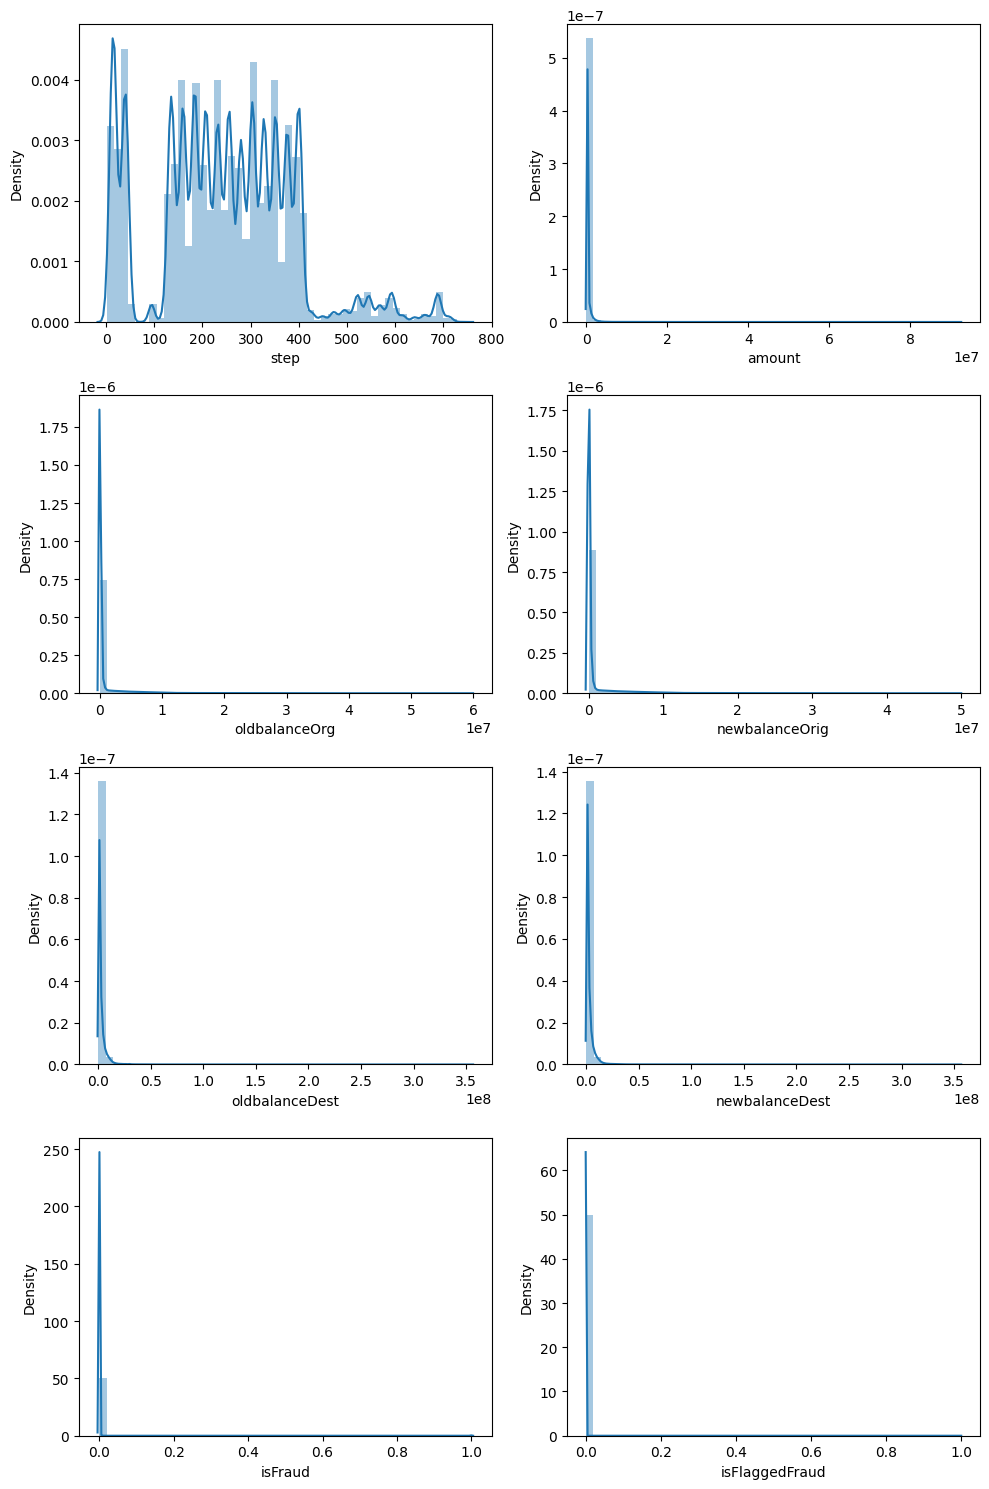

In [64]:
# Univariate Analysis
count = 1
plt.figure(figsize=(10,15))
for i in df.select_dtypes(include=np.number):
    plt.subplot(4,2,count)
    sns.distplot(df[i])
    count +=1
plt.tight_layout()
plt.show()

In [110]:
for i in df.select_dtypes(include=np.number):
    print(i,":",df[i].skew())
# the data is not normally distributed and is highly right skewed.

step : 0.37517688846984765
amount : 30.99394948249038
oldbalanceOrg : 5.249136420603121
newbalanceOrig : 5.176884001159233
oldbalanceDest : 19.921757915791062
newbalanceDest : 19.352302057660165
isFraud : 27.779538153063452
isFlaggedFraud : 630.6036294703543


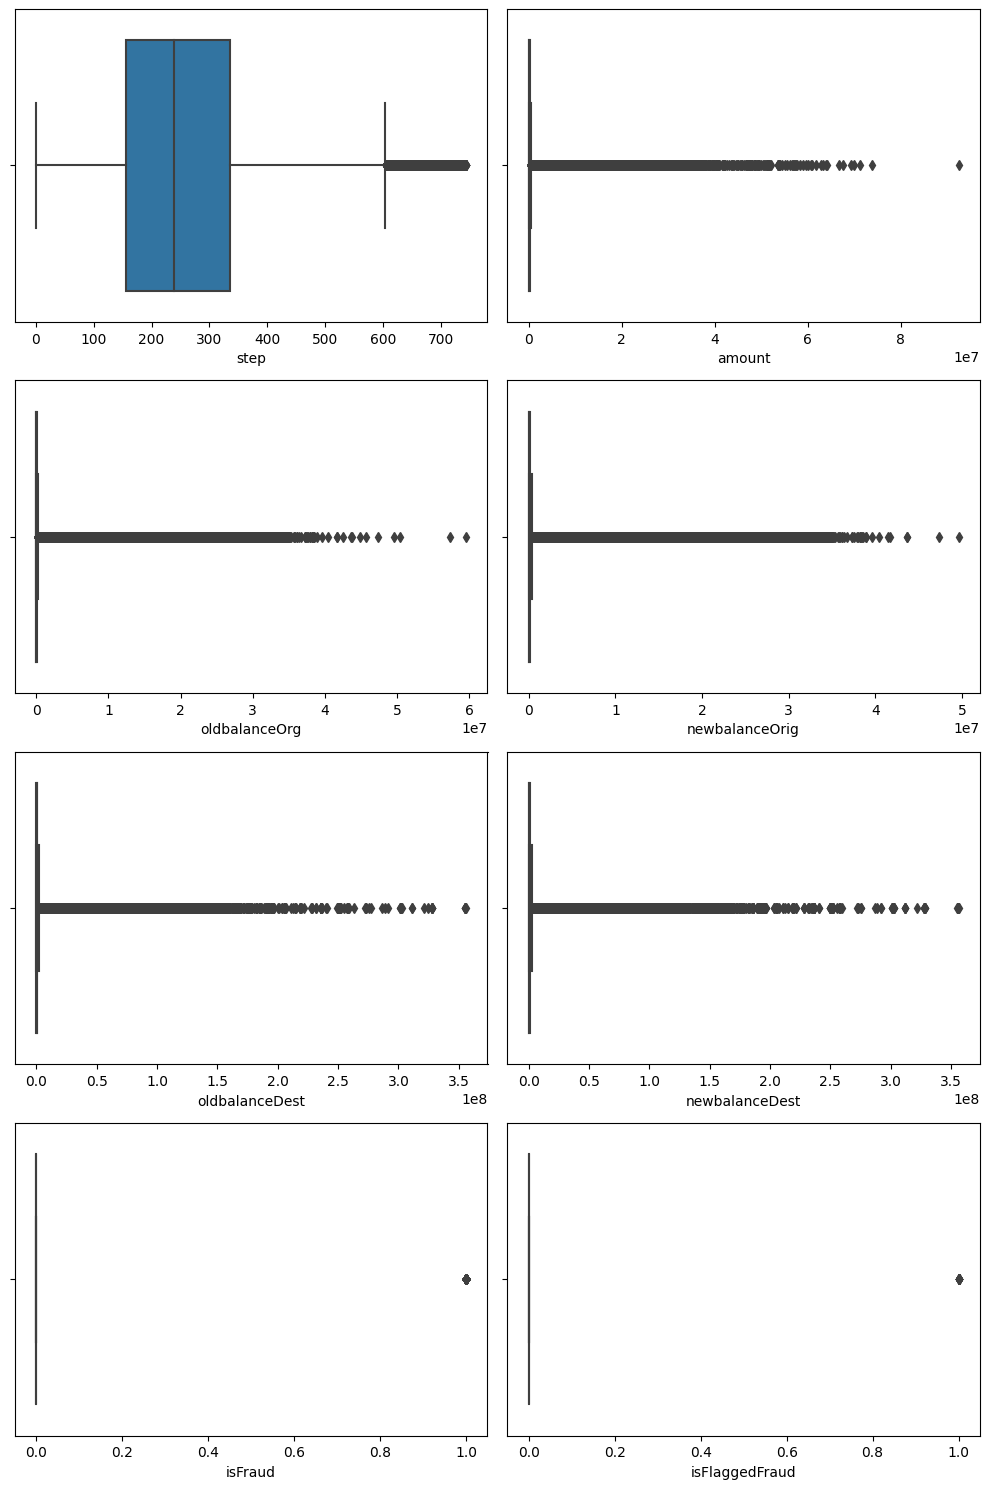

In [111]:
# cheking the outliers in the data using boxplot 
count = 1
plt.figure(figsize=(10,15))
for i in df.select_dtypes(include=np.number):
    plt.subplot(4,2,count)
    sns.boxplot(df[i])
    count +=1
plt.tight_layout()
plt.show()

In [112]:
# there are a huge number of outliers in the data that are to be treated in the further steps 

In [113]:
# univariate analysis for categorical variables 

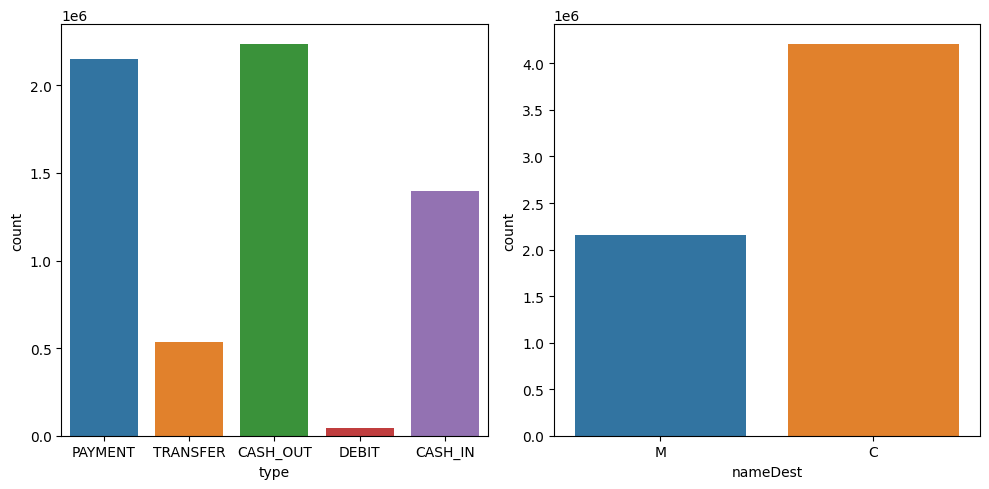

In [114]:
count = 1
plt.figure(figsize=(10,5))
for i in df.select_dtypes(include=np.object):
    plt.subplot(1,2,count)
    sns.countplot(df[i])
    count +=1
plt.tight_layout()
plt.show()

In [74]:
# most of the transaction type is for cash_out followed by payment and cash_in. Least transaction are for debit 
# transactions for the merchants are almost half the transactions of customers.

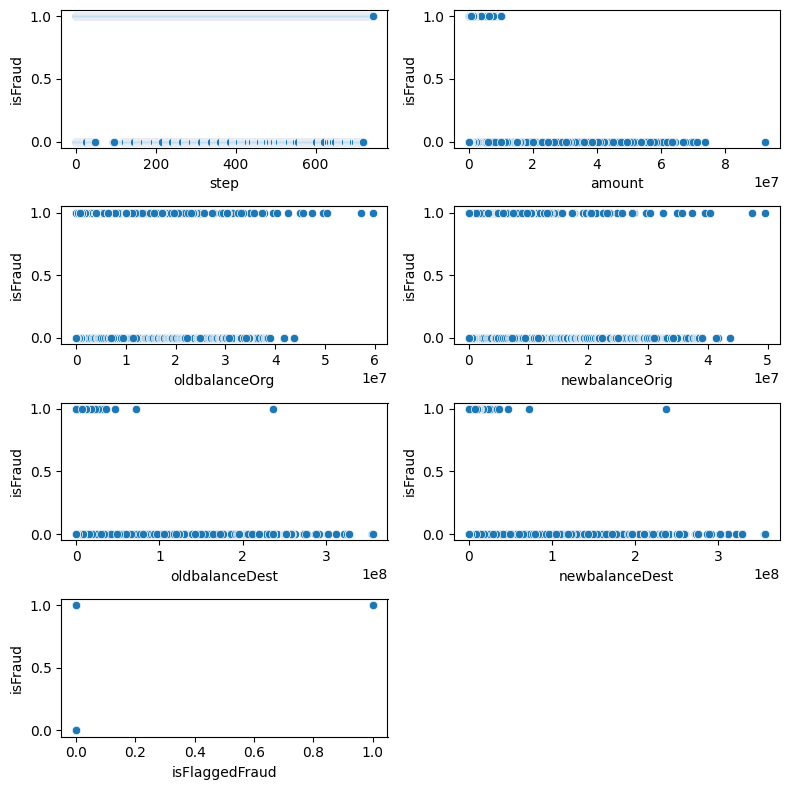

In [115]:
numcol = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest','newbalanceDest','isFlaggedFraud']
count = 1
plt.figure(figsize=(8,8))
for i in numcol:
    plt.subplot(4,2,count)
    sns.scatterplot(df[i],df.isFraud)
    count +=1
plt.tight_layout()
plt.show()

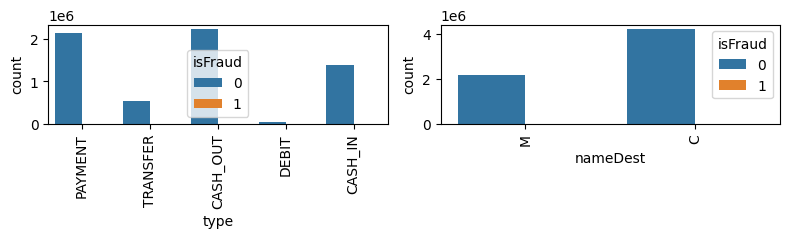

In [116]:
catcol = ['type', 'nameDest']
count = 1
plt.figure(figsize=(8,8))
for i in catcol:
    plt.subplot(4,2,count)
    sns.countplot(x=i,hue='isFraud', data=df)
    plt.xticks(rotation=90)
    count +=1
plt.tight_layout()
plt.show()

<AxesSubplot: >

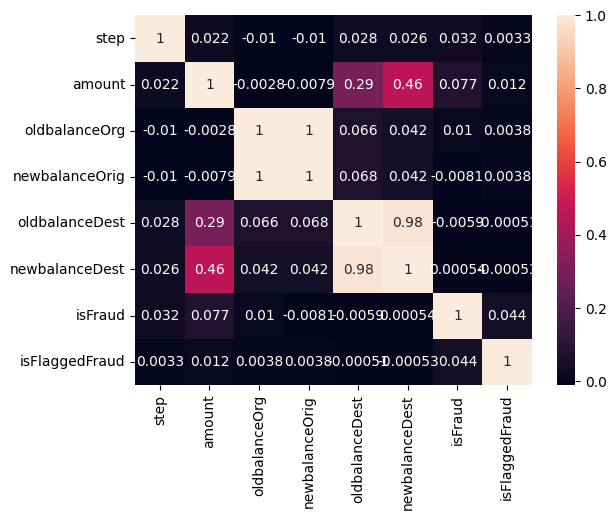

In [117]:
# checking multicollinearity in the data 
sns.heatmap(df.corr(),annot=True)

In [118]:
# there is a very high multicollinearity in the features like oldbalanceorig and newbalanceorig, oldbalancedest and newbalancedest.


In [121]:
col = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest']

In [122]:
# treating outlier from the data by capping them to upper value
for i in col:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    ul = q3 + 1.5*iqr
    ll = q1 - 1.5*iqr
    df.loc[df[i]>ul,i]=ul
    df.loc[df[i]<ll,i]=ll

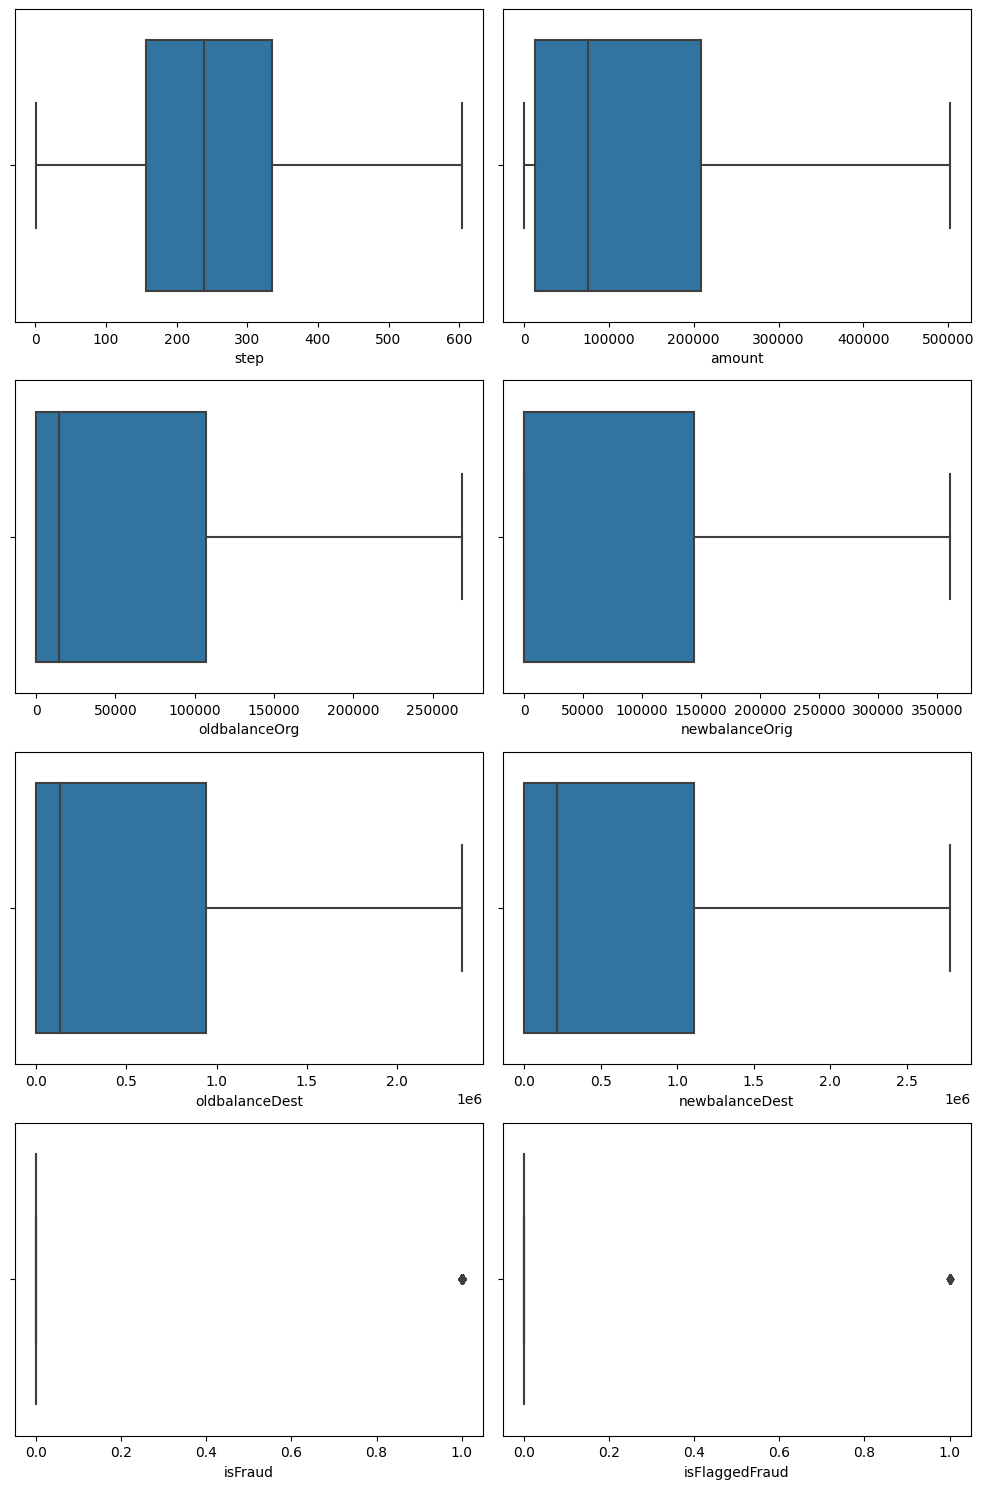

In [123]:
# checking the outliers again using boxplot 
count = 1
plt.figure(figsize=(10,15))
for i in df.select_dtypes(include=np.number):
    plt.subplot(4,2,count)
    sns.boxplot(df[i])
    count +=1
plt.tight_layout()
plt.show()

In [146]:
df1 = df.select_dtypes(include=np.number)

In [147]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_list = []

for i in range(df1.shape[1]):
    vif_list.append(variance_inflation_factor(df1.values, i))
    
vif = pd.DataFrame({'Features':df1.columns, 'VIF': vif_list})

vif.sort_values(ascending = False, by = 'VIF')

,Features,VIF
5,newbalanceDest,36.865450
4,oldbalanceDest,33.025821
3,newbalanceOrig,6.576113
2,oldbalanceOrg,6.015959
1,amount,2.688777
0,step,1.758616
6,isFraud,1.024058
7,isFlaggedFraud,1.001996


In [148]:
# since it can be seen that there is very high multicollinearity in the data in some of the features. we need to remove the 
# multicollinearity issue from the data. 
# we can generate new features from old and new balance orign and dest. 

In [150]:
df['transaction_orig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['transaction_dest'] = df['newbalanceDest'] - df['oldbalanceDest']

In [157]:
df.loc[(df['nameDest']=='M') & (df['isFraud']==1)]

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,transaction_orig,transaction_dest


In [158]:
# since there are no fraud detected in the merchants. we can remove the rows with M in nameDest.

In [161]:
df = df.loc[~(df['nameDest']=='M')]

In [163]:
# dropping the column namedest from the analysis as all the values in the column is same 

In [165]:
df.drop('nameDest',axis=1,inplace=True)

In [170]:
# applying statistical tests on the columns in order to check the significance of the features with the target.

In [174]:
from statsmodels.formula.api import ols

In [175]:
import statsmodels.api as sma

In [177]:
for i in df.select_dtypes(include=np.number):
    model = ols('isFraud~df[i]',data=df).fit()
    print(i,':')
    print(sma.stats.anova_lm(model))
    print('\n')

step :
                 df       sum_sq    mean_sq            F  PR(>F)
df[i]           1.0    10.648004  10.648004  5477.427971     0.0
Residual  4211123.0  8186.334098   0.001944          NaN     NaN


amount :
                 df       sum_sq    mean_sq            F  PR(>F)
df[i]           1.0    13.675212  13.675212  7037.252776     0.0
Residual  4211123.0  8183.306891   0.001943          NaN     NaN


oldbalanceOrg :
                 df       sum_sq    mean_sq            F  PR(>F)
df[i]           1.0    19.179429  19.179429  9876.361236     0.0
Residual  4211123.0  8177.802674   0.001942          NaN     NaN


newbalanceOrig :
                 df       sum_sq   mean_sq            F  PR(>F)
df[i]           1.0     6.940316  6.940316  3568.544059     0.0
Residual  4211123.0  8190.041786  0.001945          NaN     NaN


oldbalanceDest :
                 df       sum_sq   mean_sq            F  PR(>F)
df[i]           1.0     7.960368  7.960368  4093.540239     0.0
Residual  4211123.0  

In [178]:
# for categorical columns 
import scipy.stats as stats

In [180]:
for i in df.select_dtypes(include=np.object):
    tbl = pd.crosstab(df[i],df['isFraud'])
    test,pvalue,a,b = stats.chi2_contingency(tbl)
    print(i,":",pvalue)

type : 0.0


In [182]:
# encoding the categorical data 
# as there is no ordinal data. one hot encoding will be a better option to encode the data.

In [188]:
cat = df.select_dtypes(include=np.object)

In [190]:
cat = pd.get_dummies(cat,drop_first=True)

In [191]:
cat

,type_CASH_OUT,type_DEBIT,type_TRANSFER
2,0,0,1
3,1,0,0
9,0,1,0
10,0,1,0
15,1,0,0
...,...,...,...
6362615,1,0,0
6362616,0,0,1
6362617,1,0,0
6362618,0,0,1


In [ ]:
# scaling the data

In [194]:
from sklearn.preprocessing import RobustScaler

In [195]:
rs = RobustScaler()

In [196]:
scale = df.select_dtypes(include=np.number)

In [198]:
scale = rs.fit_transform(scale)

In [201]:
scale = pd.DataFrame(scale,columns= df.select_dtypes(include=np.number).columns)

In [209]:
cat['sn'] = np.arange(0,4211125)

In [210]:
scale['sn'] = np.arange(0,4211125)

In [211]:
final_data = scale.merge(cat,on='sn',how='inner')

In [213]:
final_data.drop('sn',axis=1,inplace=True)

In [215]:
# since our data is higly skewed, we'll be transforming the data using power transformer

In [216]:
from sklearn.preprocessing import PowerTransformer

In [217]:
pt = PowerTransformer()

In [218]:
dff = pt.fit_transform(final_data)

In [219]:
dff = pd.DataFrame(dff, columns=final_data.columns)

In [223]:
dff.isFraud = final_data['isFraud']

In [225]:
# splitting the data into train test split 
X = dff.drop('isFraud',axis=1)
y = dff.isFraud

In [228]:
from sklearn.model_selection import train_test_split

In [239]:
from imblearn.over_sampling import SMOTE

# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the data and split it into training and test sets
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# The training data is now balanced
print(f'Original training data shape: {X.shape}')
print(f'Resampled training data shape: {X_resampled.shape}')


Original training data shape: (4211125, 12)
Resampled training data shape: (8405824, 12)


In [240]:
y_resampled = pd.DataFrame(y_resampled)

In [242]:
X_resampled['sn'] = np.arange(0,8405824)
y_resampled['sn'] = np.arange(0,8405824)

In [243]:
data = X_resampled.merge(y_resampled,on='sn',how='inner')

In [246]:
data.drop('sn',axis=1,inplace=True)

In [248]:
for i in data.select_dtypes(include=np.number):
    model = ols('isFraud~data[i]',data=data).fit()
    print(i,':')
    print(sma.stats.anova_lm(model))
    print('\n')

step :
                 df        sum_sq        mean_sq              F  PR(>F)
data[i]         1.0  1.969476e+05  196947.640341  869256.782007     0.0
Residual  8405822.0  1.904508e+06       0.226570            NaN     NaN


amount :
                 df        sum_sq        mean_sq              F  PR(>F)
data[i]         1.0  2.065824e+05  206582.388720  916417.209874     0.0
Residual  8405822.0  1.894874e+06       0.225424            NaN     NaN


oldbalanceOrg :
                 df        sum_sq        mean_sq             F  PR(>F)
data[i]         1.0  6.384460e+05  638446.022246  3.668234e+06     0.0
Residual  8405822.0  1.463010e+06       0.174047           NaN     NaN


newbalanceOrig :
                 df        sum_sq        mean_sq             F  PR(>F)
data[i]         1.0  4.057792e+05  405779.232139  2.011532e+06     0.0
Residual  8405822.0  1.695677e+06       0.201726           NaN     NaN


oldbalanceDest :
                 df        sum_sq        mean_sq             F  PR(>

<AxesSubplot: >

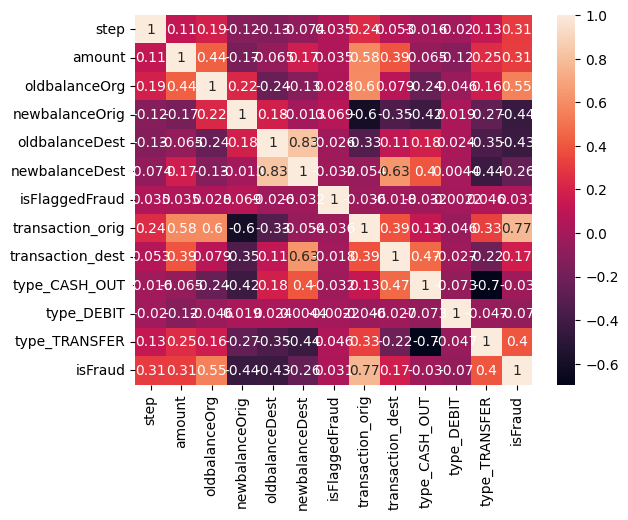

In [249]:
sns.heatmap(data.corr(),annot=True)

In [253]:
# applying logistic regression as a base model 
from sklearn.linear_model import LogisticRegression

In [254]:
lr = LogisticRegression()
pred = lr.fit(X_train,y_train).predict(X_test)

In [256]:
from sklearn.metrics import classification_report

In [257]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93    841022
         1.0       0.92      0.93      0.93    840143

    accuracy                           0.93   1681165
   macro avg       0.93      0.93      0.93   1681165
weighted avg       0.93      0.93      0.93   1681165



In [258]:
# applying some ensemble techniques on the models as there are some features in our data that are multicollinear and are 
# also significant too according to the statistical tests. as tree based models are robust to multicollinearity. we should 
#  apply some ensemble techniques such as random forest , ada boost , xg boost as our next models. 

In [259]:
from sklearn.ensemble import RandomForestClassifier

In [260]:
rf = RandomForestClassifier()
predrf = rf.fit(X_train,y_train).predict(X_test)

In [261]:
print(classification_report(y_test,predrf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    841022
         1.0       1.00      1.00      1.00    840143

    accuracy                           1.00   1681165
   macro avg       1.00      1.00      1.00   1681165
weighted avg       1.00      1.00      1.00   1681165



In [263]:
from sklearn.ensemble import AdaBoostClassifier

In [265]:
ab = AdaBoostClassifier()
predab = ab.fit(X_train,y_train).predict(X_test)

In [266]:
print(classification_report(y_test,predab))

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97    841022
         1.0       0.96      0.98      0.97    840143

    accuracy                           0.97   1681165
   macro avg       0.97      0.97      0.97   1681165
weighted avg       0.97      0.97      0.97   1681165



In [267]:
from xgboost import XGBClassifier

In [268]:
xgb = XGBClassifier()
predxg = xgb.fit(X_train,y_train).predict(X_test)

In [269]:
print(classification_report(y_test,predxg))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    841022
         1.0       1.00      1.00      1.00    840143

    accuracy                           1.00   1681165
   macro avg       1.00      1.00      1.00   1681165
weighted avg       1.00      1.00      1.00   1681165



In [272]:
# since there is a very high level of multicollinearity in the data and the features are significant. we can apply 
# PRINCIPLE COMPONENT ANALYSIS (PCA) on the data to deal with this problem 

In [274]:
from sklearn.decomposition import PCA

In [278]:
pc = PCA(n_components=12)
dfpca = pc.fit_transform(X_resampled)

In [277]:
X_resampled.drop('sn',axis=1,inplace=True)

In [281]:
dfpca = pd.DataFrame(dfpca,columns = np.arange(1,13))

In [283]:
lis = []
add = 0
for i in pc.explained_variance_ratio_:
    add += i 
    lis.append(add)
print(lis)

[0.9402053961959763, 0.9626534824697369, 0.9769104184126594, 0.9827463311539663, 0.9880942151126598, 0.9927347961335372, 0.9955876240101679, 0.9977942996776185, 0.9995405116289857, 0.9998575774111828, 0.9999546998279891, 1.0]


In [284]:
# since our 6 components explains 99.27% in the data. we can take 6 principle components in the further analysis 

In [285]:
# checking the multicollinearity in the data 

<AxesSubplot: >

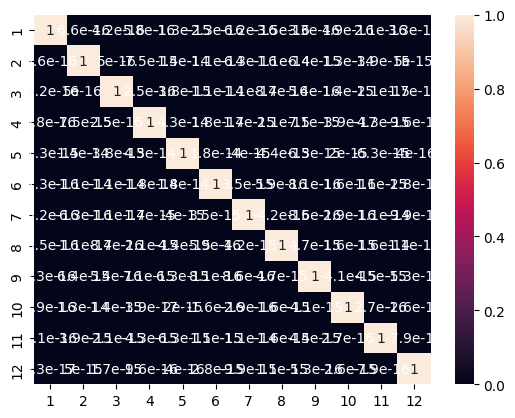

In [287]:
sns.heatmap(dfpca.corr(),annot=True)

In [288]:
# it can be seen that multicollinearity has been treated in the data. 


In [291]:
pcdf = dfpca[np.arange(1,7)]

In [293]:
# train test split 

In [299]:
x_train, x_test, y_train, y_test = train_test_split(pcdf,y_resampled, test_size=0.20,random_state=42)

In [300]:
# applying logistic regression 
predpc = lr.fit(x_train,y_train).predict(x_test)

In [301]:
print(classification_report(y_test,predpc))

              precision    recall  f1-score   support

         0.0       0.89      0.92      0.91    841022
         1.0       0.92      0.89      0.91    840143

    accuracy                           0.91   1681165
   macro avg       0.91      0.91      0.91   1681165
weighted avg       0.91      0.91      0.91   1681165



In [302]:
# applying random forest to our data 
predpcrf = rf.fit(x_train,y_train).predict(x_test)

In [303]:
print(classification_report(y_test,predpcrf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    841022
         1.0       1.00      1.00      1.00    840143

    accuracy                           1.00   1681165
   macro avg       1.00      1.00      1.00   1681165
weighted avg       1.00      1.00      1.00   1681165



In [304]:
predpcab = ab.fit(x_train,y_train).predict(x_test)

In [305]:
print(classification_report(y_test,predpcab))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95    841022
         1.0       0.96      0.93      0.94    840143

    accuracy                           0.95   1681165
   macro avg       0.95      0.95      0.95   1681165
weighted avg       0.95      0.95      0.95   1681165



In [306]:
predpcxg = xgb.fit(x_train,y_train).predict(x_test)

In [307]:
print(classification_report(y_test,predpcxg))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    841022
         1.0       0.99      1.00      0.99    840143

    accuracy                           0.99   1681165
   macro avg       0.99      0.99      0.99   1681165
weighted avg       0.99      0.99      0.99   1681165



# Answers for the assignment

## 1. Data cleaning including missing values, outliers and multi-collinearity.

ANS: Data cleaning was performed to address issues of outliers and multicollinearity in the dataset.
Outliers were capped at the upper and lower limits to mitigate their impact on the analysis.
To address multicollinearity, PCA was applied to the data instead of dropping any features as all the features were deemed statistically important.
Two categorical features (names of origin and destination) were kept for the analysis.
Rows with "M" in the destination feature were eliminated as they showed no correlation with the target.
To balance the highly imbalanced dataset (99:1 ratio), SMOTE was applied to oversample the minority class.

## 2. Describe your fraud detection model in elaboration. 
 
 Ans : The fraud detection model developed in the project was aimed at predicting fraudulent transactions using a set of features such as step (unit of time), transaction amount, origin and destination name, and balance information before and after the transaction. The target variable was "isFraud", where a value of 0 indicates an authentic transaction and 1 indicates a fraudulent transaction.

To improve the predictive power of the model, feature engineering was performed to create a new column "transaction_origin" based on the difference between the old and new balance of the origin, which showed a high correlation of 77% with the target variable.

To handle the imbalanced nature of the dataset, the Synthetic Minority Over-sampling Technique (SMOTE) was applied to oversample the minority class. In addition, to address the issue of multicollinearity in the dataset, Principal Component Analysis (PCA) was applied, and 6 principle components were selected to explain 99% of the variance in the data.

The base model used was a logistic regression model, which achieved an overall accuracy of 91%. The recall and precision for isFraud=1 were 89% and 92%, respectively, while for isFraud=0, recall and precision were 92% and 89%, respectively. Additionally, the f1 score was 91%.

Next, a Random Forest Classifier was applied, which resulted in an overfit to the data. Finally, XGBoost was used as a bootstrapped and boosted model and achieved an accuracy of 99%, with a recall and precision of 99% and 1, respectively, without any hyperparameter tuning.

In conclusion, the fraud detection model was able to effectively predict fraudulent transactions using a combination of feature engineering, SMOTE, PCA, and an optimized machine learning model (XGBoost).





## 3. How did you select variables to be included in the model?

Ans : The features for inclusion in the model were determined through a combination of statistical analysis and performance evaluation. An Analysis of Variance (ANOVA) test was applied to identify the significant features based on their statistical significance. Additionally, a correlation analysis was performed to determine which features had a significant correlation with the target variable "isFraud".

Based on this analysis, a new feature "transaction_origin" was created by calculating the difference between the old and new balance of the origin, which showed a high correlation of 77% with the target variable. The data was then subjected to PCA to reduce multicollinearity and select the most important components that explained the majority of the variance in the data. 6 principle components were selected, which explained 99% of the variance.

Finally, the selected features were used to build the machine learning models, and the performance of the models was evaluated based on their accuracy and other evaluation metrics. The final set of features included in the model were those that showed significant statistical importance as well as a high correlation with the target and contributed to the best performance of the model.

## 4. Demonstrate the performance of the model by using best set of tools. 

Ans: From the results of the XGBoost model, it can be concluded that the model is a good one with high accuracy, recall, precision, and F1 score. The accuracy of 99% indicates that the model correctly classifies 99% of the instances. The recall and precision for the positive class (fraud) are both high at 99%, which means that the model correctly identifies 99% of the fraud transactions and correctly classifies 99% of the instances as fraud that are actually fraud. The F1 score of 99% further confirms the good performance of the model as it takes into account both precision and recall.

## 5. What are the key factors that predict fraudulent customer? 

Ans: There are many key factors which predicts the fraudulent customers such as the transaction type. most of the fraud customers were from the cash_out transaction type. also the new feature generated was also the key factor as it was having a 77% of the correlation with the target, which means that an unusual or large amount of transaction tends to increase the chances of a fraud transaction. 

## 6. Do these factors make sense? If yes, How? If not, How not? 

Ans : Yes these factors definity makes sense as most of the fraud customers tends to cash out their money and also those with a very high or unusual transaction gives a very high probability of a fraudulent transaction. 

## 7. What kind of prevention should be adopted while company update its infrastructure?

Ans: To prevent fraud while updating the company's infrastructure, the following steps can be considered:

Data protection: Ensure that sensitive customer data is stored securely and protected from unauthorized access, theft or loss.

Access control: Implement strict access controls for employees, contractors, and other third-party partners to minimize the risk of insider fraud.

Monitoring and detection systems: Implement real-time monitoring systems to detect suspicious transactions and detect fraud early.

User authentication: Implement strong user authentication mechanisms, such as two-factor authentication, to prevent unauthorized access to sensitive information.

Secure software development: Adopt secure software development practices and regularly test the security of the infrastructure to ensure that vulnerabilities are identified and addressed before they can be exploited.

Employee training: Train employees on the importance of data protection and the dangers of social engineering, phishing, and other common types of fraud.

Compliance: Ensure that the company is compliant with relevant regulations, such as data protection laws and anti-money laundering regulations, to minimize the risk of fraud and legal penalties.

By following these steps, the company can adopt an effective fraud prevention strategy and reduce the risk of fraud while updating its infrastructure.

## 8. Assuming these actions have been implemented, how would you determine if they work?

Ans: To determine if the fraud prevention actions implemented are effective, the following metrics and techniques can be used:

Fraud detection rate: Monitor the rate of successful fraud detection, and track improvements over time.

False positive rate: Track the number of false positive alerts, and ensure that the rate remains low to minimize customer friction.

Loss reduction: Track the reduction in fraud-related losses, and compare this to the costs of implementing and maintaining the fraud prevention measures.

Customer feedback: Collect customer feedback on the fraud prevention measures, and address any concerns or complaints in a timely manner.

Compliance audits: Regularly conduct audits to ensure that the company remains compliant with relevant regulations and that the fraud prevention measures are functioning as intended.

Threat intelligence: Stay informed of the latest fraud trends and tactics, and adapt the fraud prevention measures accordingly.

By regularly monitoring these metrics and techniques, the company can determine the effectiveness of the fraud prevention measures and make any necessary improvements.



